source: https://ieeexplore.ieee.org/document/7754220/

In [12]:
import os
import fnmatch
import numpy as np
from skimage import filters, io, color, exposure, util

In [13]:
dir_img = 'D:/Datasets/thesis_dr/aptos2019/train_images_preprocessing_v2/rescaled_300_crop/'
dir_save = 'D:/Datasets/thesis_dr/aptos2019/train_images_preprocessing_v2/rescaled_300_crop_ramasubramanian/'

if os.path.isdir(dir_save) == False:
    os.mkdir(dir_save)

In [14]:
fimages = fnmatch.filter(os.listdir(dir_img), '*.png')
len(fimages)

3662

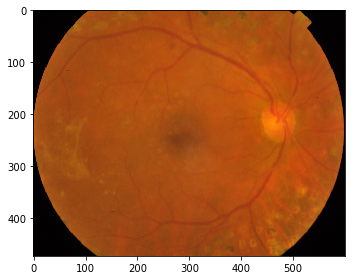

In [15]:
img = io.imread(os.path.join(dir_img, fimages[1]))
io.imshow(img)

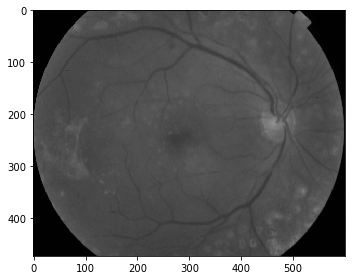

In [16]:
io.imshow(img[:, :, 1])

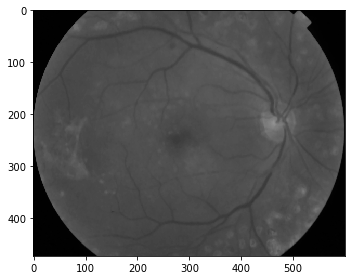

In [17]:
tes = filters.median(img[:,:,1])
io.imshow(tes)

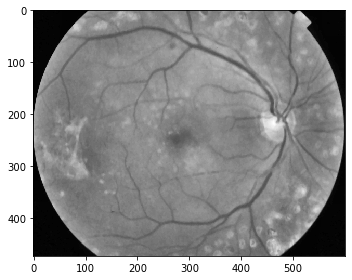

In [18]:
img_clahe = exposure.equalize_adapthist(tes)
io.imshow(img_clahe)

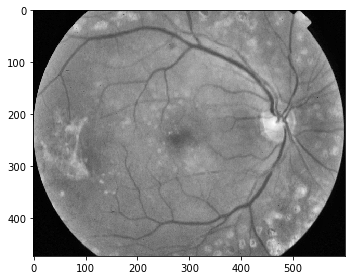

In [19]:
img_clahe = exposure.equalize_adapthist(img[:, :, 1])
io.imshow(img_clahe)

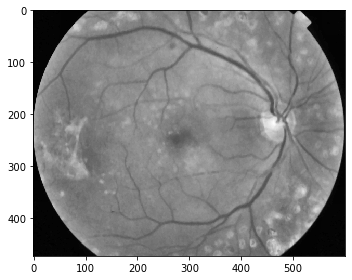

In [20]:
img = io.imread(os.path.join(dir_img, fimages[1]))
img_g = img[:, :, 1]
img_g = filters.median(img_g)
img_g = exposure.equalize_adapthist(img_g)
img_g = np.dstack((img_g, img_g, img_g))
io.imshow(img_g)

In [10]:
img_g.shape

(461, 600, 3)

In [11]:
counter = 0
list_error = list()

for f in fimages:
    counter += 1

    if counter % 250 == 0:
        print('image processed: ', counter)

    try:
        img = io.imread(os.path.join(dir_img, f))
        img_g = img[:, :, 1]
        img_g = filters.median(img_g)
        img_g = exposure.equalize_adapthist(img_g)
        img_g = np.dstack((img_g, img_g, img_g))
        img_g = util.img_as_ubyte(img_g)
        io.imsave(os.path.join(dir_save, f), img_g)
    except:
        print(f)
        list_error.append(f)

image processed:  250
image processed:  500
image processed:  750
image processed:  1000
image processed:  1250
image processed:  1500
image processed:  1750
image processed:  2000
image processed:  2250
image processed:  2500
image processed:  2750
image processed:  3000
image processed:  3250
image processed:  3500


In [12]:
list_error

[]